# **Find your Best Bottle of Wine**


Imagine you come into a wine store, and a knowledgeable vintner tells you all that you want to know about their wines and helps you select the best bottle based on your tastes and cravings. Since you had such a good experience you may buy more wine. This may even give you an idea to open an online wine store, based on a recommender system that provides the same recommendations, as the knowledgeable vintner. 

In this Project, you will use wine dataset and perform some data wrangling techniques to extract interesting information about wines.

----


![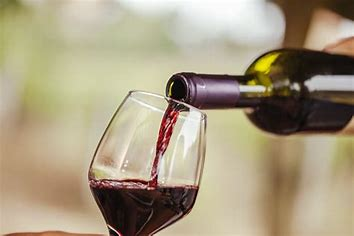](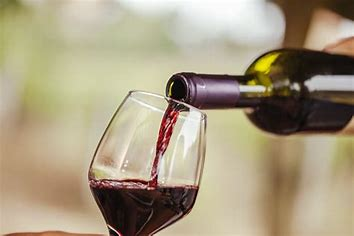)

# Setup


For this project, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this project are listed below. The libraries pre-installed are commented.
!pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


In [2]:
!pip install tabulate

In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly

# Importing Required Libraries

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tabulate import tabulate
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# About the Wine Dataset

The data was scraped from [Wine Enthusiast](https://www.winemag.com/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0SV2EN1425-2022-01-01&s=&drink_type=wine) during the week of June 15th, 2017. It can be downloaded from [kaggle.com](https://www.kaggle.com/datasets/zynicide/wine-reviews?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0SV2EN1425-2022-01-01) or from the IBM Cloud Storage by running the code below. 

The dataset contains around 130,000 rows of wine reviews with some other features such as title of the wine, country, province, and region of the vineyard, description, designation, taster's name and twitter handle, variety, winery, price, and rating. These reviews span roughly 20 years, with dozens of countries and hundreds of grape varieties. 


---


We start by reading our data into a dataframe, using *panda's* library and printing the first 5 rows.


In [6]:
df = pd.read_csv("../input/wine-reviews/winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Let's see the shape of our data:


In [7]:
df.shape

(129971, 14)

In [8]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


The dataset contains 129971 entries and 14 columns.


# Data Cleaning

In [9]:
missing_vals = df['price'].isnull().sum() 
print('so there are '+ str(missing_vals) + ' missing values in price column')

so there are 8996 missing values in price column


In [10]:
df1=df[pd.isnull(df.country)]
df1.shape

(63, 14)

In [11]:
df.region_2.fillna("Unknown")

0                   Unknown
1                   Unknown
2         Willamette Valley
3                   Unknown
4         Willamette Valley
                ...        
129966              Unknown
129967         Oregon Other
129968              Unknown
129969              Unknown
129970              Unknown
Name: region_2, Length: 129971, dtype: object

# Data Wrangling 


Let's start by cleaning up our data first. Below, we drop any duplicated entries (based on the "description" column) contained in the dataset.


In [12]:
df = df.drop_duplicates('description')
df.shape

(119955, 14)

We check if there are any missing values:


In [13]:
df.isnull().sum()

Unnamed: 0                   0
country                     59
description                  0
designation              34532
points                       0
price                     8388
province                    59
region_1                 19558
region_2                 73195
taster_name              24912
taster_twitter_handle    29441
title                        0
variety                      1
winery                       0
dtype: int64

Let's drop the null prices.


In [14]:
df = df.dropna(subset=['price'])
df.shape

(111567, 14)

Now, we can play we the dataset to extract some interesting information about our wines. We set the index to "country" column, so it is easier to filter our data to a specific country.


In [15]:
country = df.set_index("country")

For example, we can filter out only Italian wines:


In [16]:
Italy = country.loc[["Italy"]]
Italy

,Unnamed: 0,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
country,,,,,,,,,,,,,
Italy,6,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
Italy,22,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto
Italy,24,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì
Italy,26,Pretty aromas of yellow flower and stone fruit...,Dalila,87,13.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari
Italy,27,"Aromas recall ripe dark berry, toast and a whi...",NaN,87,10.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Nero d'Avola (Terre Siciliane),Nero d'Avola,Stemmari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Italy,129929,"This luminous sparkler has a sweet, fruit-forw...",NaN,91,38.0,Veneto,Prosecco Superiore di Cartizze,NaN,NaN,NaN,Col Vetoraz Spumanti NV Prosecco Superiore di...,Prosecco,Col Vetoraz Spumanti
Italy,129943,"A blend of Nero d'Avola and Syrah, this convey...",Adènzia,90,29.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio del Cristo di Campobello 2012 Adènzia R...,Red Blend,Baglio del Cristo di Campobello
Italy,129947,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",Symposio,90,20.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Feudo Principi di Butera 2012 Symposio Red (Te...,Red Blend,Feudo Principi di Butera


# Select and display dataframe containing US and Spanish wines.


In [17]:
us_spain = df[(df["country"] == "US") | (df["country"] == "Spain")]
us_spain

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129949,129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs
129950,129950,US,This opens with herbaceous dollops of thyme an...,Blocks 7 & 22,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry
129952,129952,US,This Zinfandel from the eastern section of Nap...,NaN,90,22.0,California,Chiles Valley,Napa,Virginie Boone,@vboone,Houdini 2011 Zinfandel (Chiles Valley),Zinfandel,Houdini
129957,129957,Spain,Lightly baked berry aromas vie for attention w...,Crianza,90,17.0,Northern Spain,Rioja,NaN,Michael Schachner,@wineschach,Viñedos Real Rubio 2010 Crianza (Rioja),Tempranillo Blend,Viñedos Real Rubio


### Now let's visualize our data. Let's see which countries contain the biggest amount of wine reviews. We will use *matplotlib* library to plot top 10 countries.


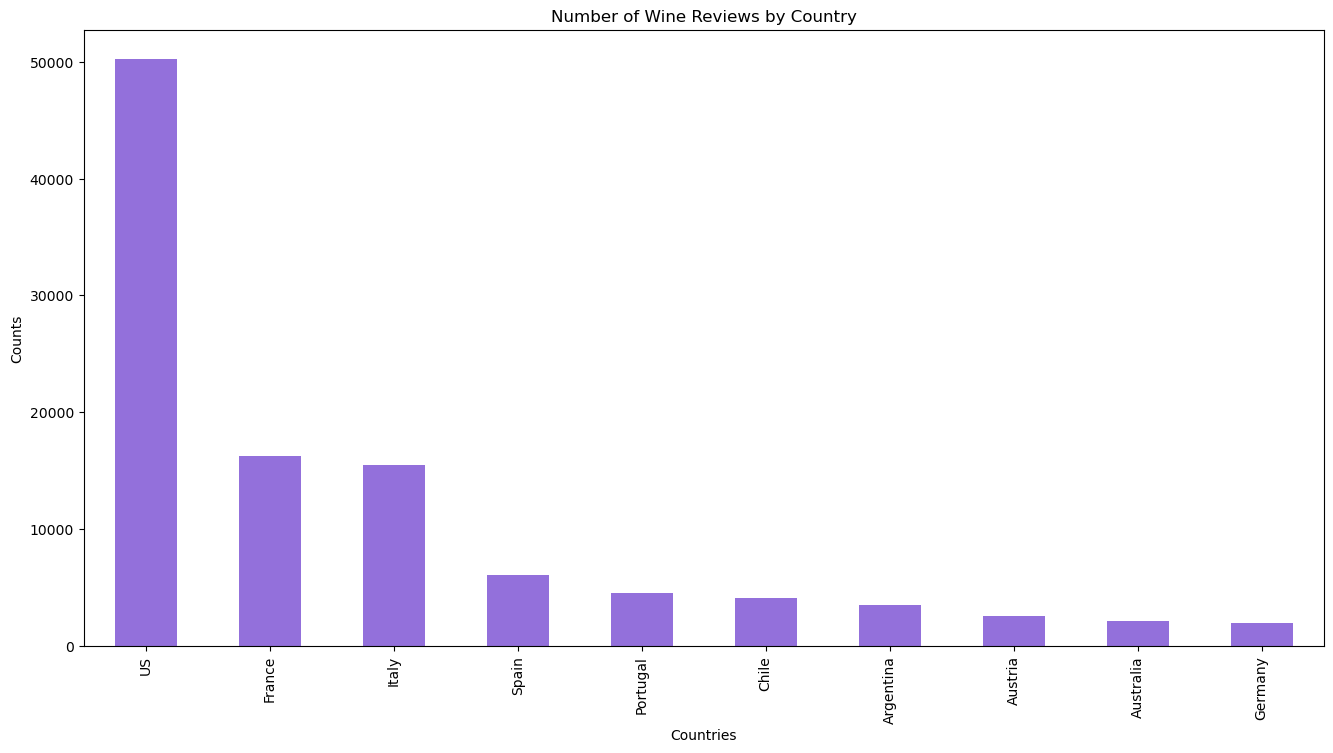

In [18]:
df.country.value_counts().iloc[:10].plot(kind = 'bar', figsize = (16, 8), color = "#9370DB")
plt.title('Number of Wine Reviews by Country')
plt.ylabel('Counts')
plt.xlabel('Countries')
plt.show()

### US seems to have the highest number of reviews.


# Make a similar plot as above, only for top 10 varieties of wine.


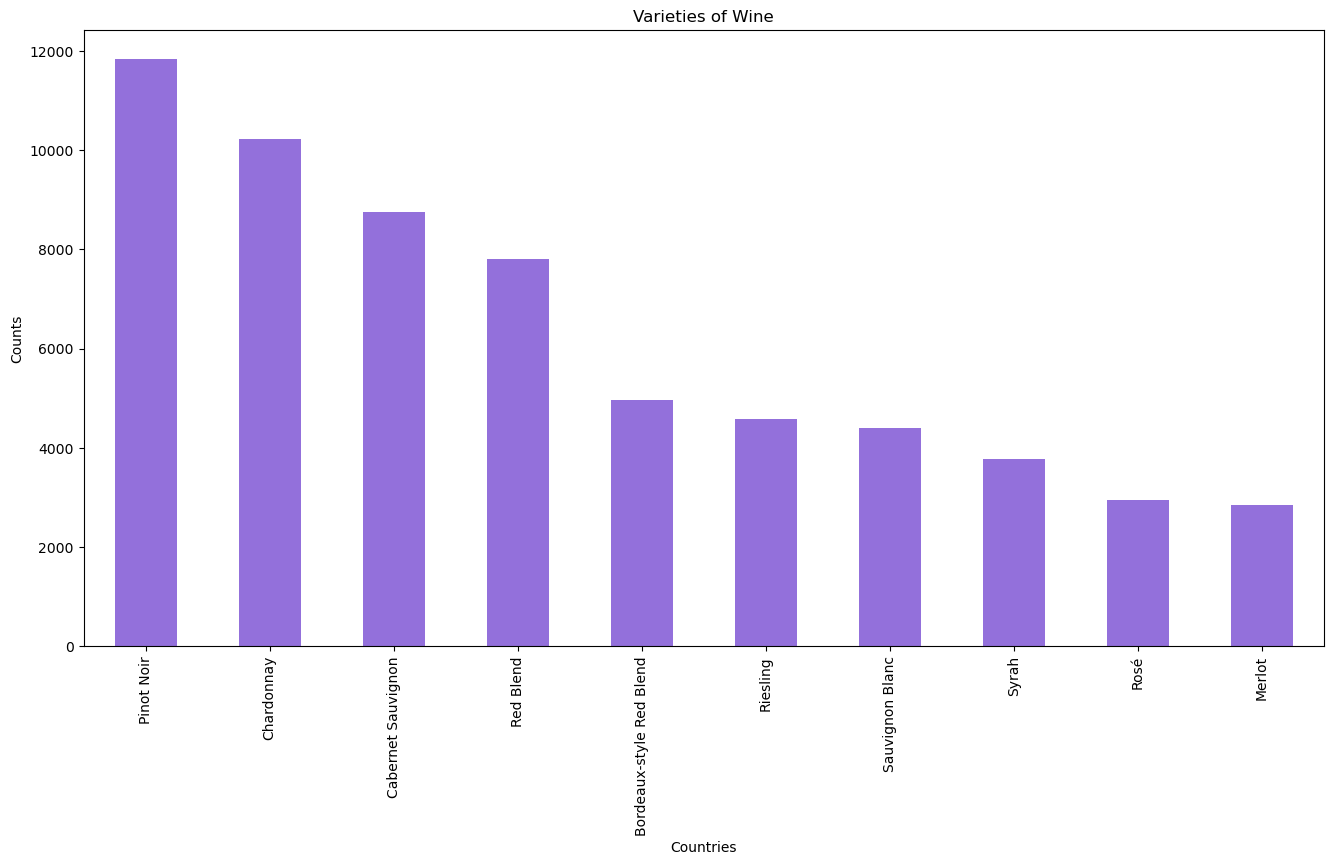

In [19]:
df.variety.value_counts().iloc[:10].plot(kind = 'bar', figsize = (16, 8),  color = "#9370DB")
plt.title('Varieties of Wine')
plt.ylabel('Counts')
plt.xlabel('Countries')
plt.show()

### Now, let's group some data to show the most expensive varieties of wine.


In [20]:
exp_wines = df.groupby(['variety'])['price'].max().sort_values(ascending = False).to_frame()[:20]

We'll use *seaborn* library, `barplot()` function, to produce the visualization.


[Text(0.5, 1.0, 'The Most Expensive Varieties')]

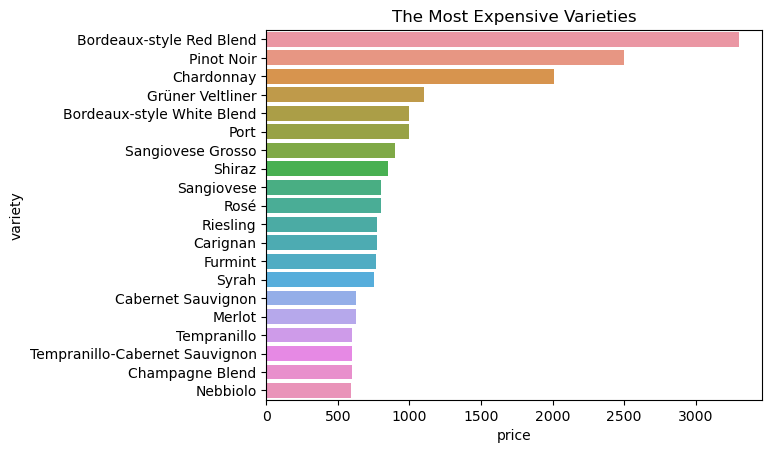

In [21]:
sns.barplot(x = exp_wines['price'], y = exp_wines.index).set(title='The Most Expensive Varieties')


# Group some data to show the highest quality varieties of wine. Use *seaborn* library, `barplot()` function, to produce the visualization.


<Axes: xlabel='points', ylabel='variety'>

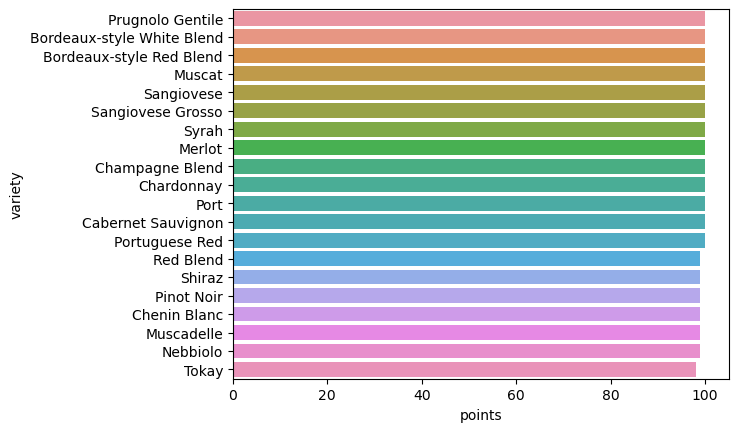

In [22]:
high_qual = df.groupby(['variety'])['points'].max().sort_values(ascending = False).to_frame()[:20]
sns.barplot(x = high_qual['points'], y = high_qual.index)

## Now, let's find out if we can find some good quality wines under $25. We'll use point score higher than '89' as an indicator of good wine.


In [23]:
good_under25 = df[(df["price"] < 25) & (df["points"] >= 89)]
good_under25

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
127,127,France,Attractive mid-gold color with intense aromas ...,Alsace One,91,13.0,Alsace,Alsace,NaN,NaN,NaN,Pierre Sparr 2008 Alsace One White (Alsace),White Blend,Pierre Sparr
128,128,France,"Compelling minerality on the nose, Refined and...",NaN,91,17.0,Alsace,Alsace,NaN,NaN,NaN,Kuentz-Bas 2008 Pinot Blanc (Alsace),Pinot Blanc,Kuentz-Bas
131,131,France,Attractive mid-gold color. Compelling layers o...,Gentil,91,20.0,Alsace,Alsace,NaN,NaN,NaN,Dopff & Irion 2008 Gentil White (Alsace),Alsace white blend,Dopff & Irion
138,138,France,Mid-gold color. Very mineral driven with subtl...,Crustacés,90,10.0,Alsace,Alsace,NaN,NaN,NaN,Dopff & Irion 2008 Crustacés White (Alsace),Alsace white blend,Dopff & Irion
142,142,US,"A beautiful wine, sleek, crisp and ultra-dry, ...",NaN,90,17.0,California,Santa Lucia Highlands,Central Coast,NaN,NaN,Banyan 2007 Riesling (Santa Lucia Highlands),Riesling,Banyan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129954,129954,New Zealand,One of the more characterful Pinot Gris for th...,Single Estate,90,15.0,Marlborough,NaN,NaN,Joe Czerwinski,@JoeCz,Ara 2013 Single Estate Pinot Gris (Marlborough),Pinot Gris,Ara
129956,129956,New Zealand,"The blend is 44% Merlot, 33% Cabernet Sauvigno...",Gimblett Gravels Merlot-Cabernet Sauvignon-Malbec,90,19.0,Hawke's Bay,NaN,NaN,Joe Czerwinski,@JoeCz,Esk Valley 2011 Gimblett Gravels Merlot-Cabern...,Bordeaux-style Red Blend,Esk Valley
129957,129957,Spain,Lightly baked berry aromas vie for attention w...,Crianza,90,17.0,Northern Spain,Rioja,NaN,Michael Schachner,@wineschach,Viñedos Real Rubio 2010 Crianza (Rioja),Tempranillo Blend,Viñedos Real Rubio
129963,129963,Israel,"A bouquet of black cherry, tart cranberry and ...",Oak Aged,90,20.0,Galilee,NaN,NaN,Mike DeSimone,@worldwineguys,Dalton 2012 Oak Aged Cabernet Sauvignon (Galilee),Cabernet Sauvignon,Dalton


# Create a visualization plot showing the lowest priced varieties of wine with higher than '89' score points.


<Axes: xlabel='price', ylabel='variety'>

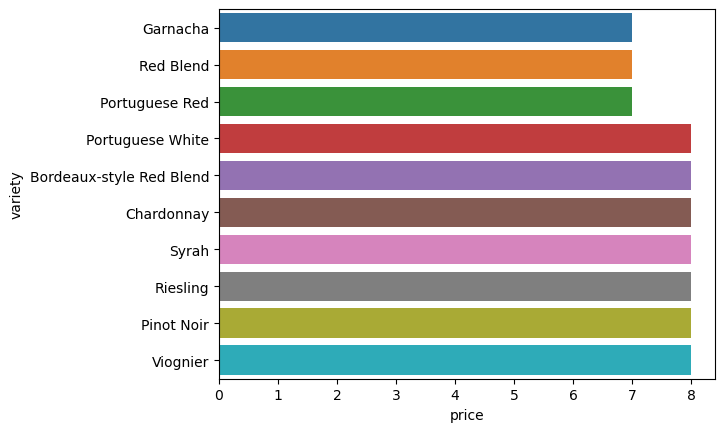

In [24]:
s = good_under25.groupby(['variety'])['price'].min().sort_values(ascending = True).to_frame()[:10]
sns.barplot(x = s['price'], y = s.index)

# Visualizations

# Area plot

<Axes: title={'center': 'Prices of wine'}>

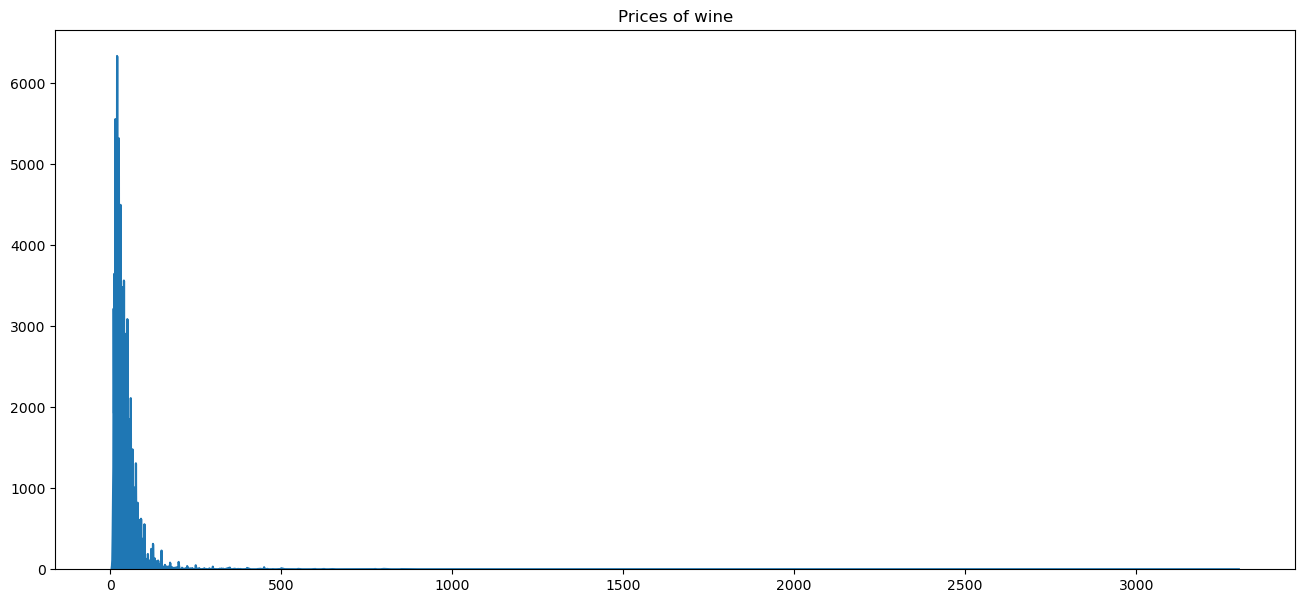

In [25]:
df['price'].value_counts().sort_index().plot.area(
    figsize = (16,7),
    title = 'Prices of wine'
)

# Line Plot

<Axes: >

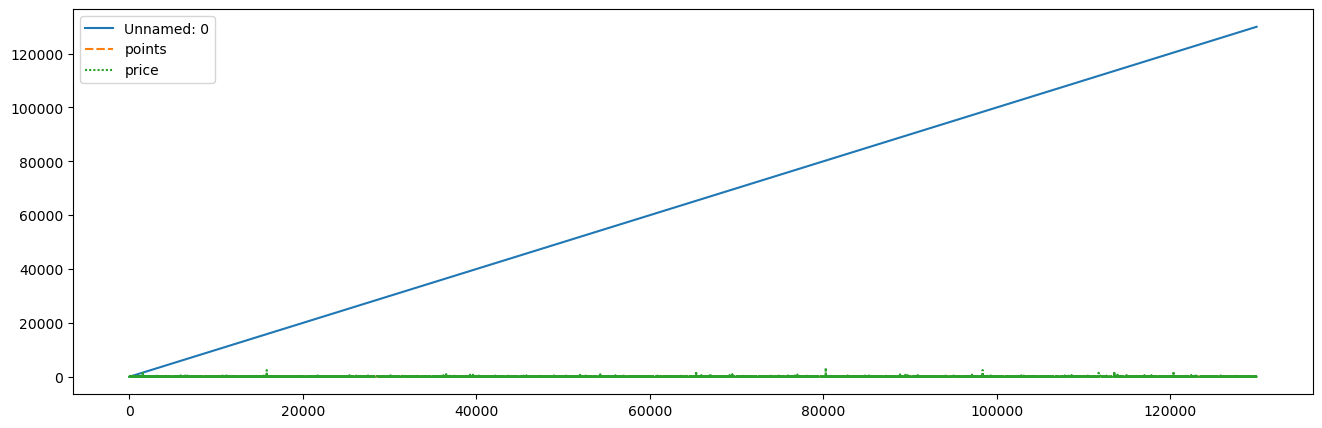

In [26]:
plt.figure(figsize=(16,5))
sns.lineplot(data=df)

# Box Plot

<Axes: xlabel='variety', ylabel='points'>

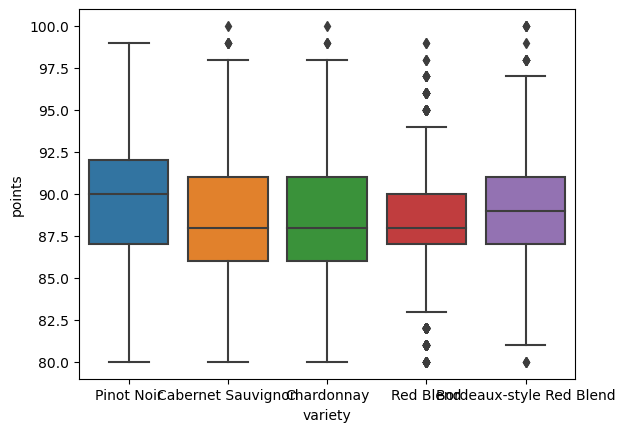

In [27]:
df = df[df.variety.isin(df.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)

### This boxplot shows us that although all five wines recieve broadly similar ratings, Bordeaux-style wines tend to be rated a little higher than a Chardonnay.

# Violin Plot

<Axes: xlabel='variety', ylabel='points'>

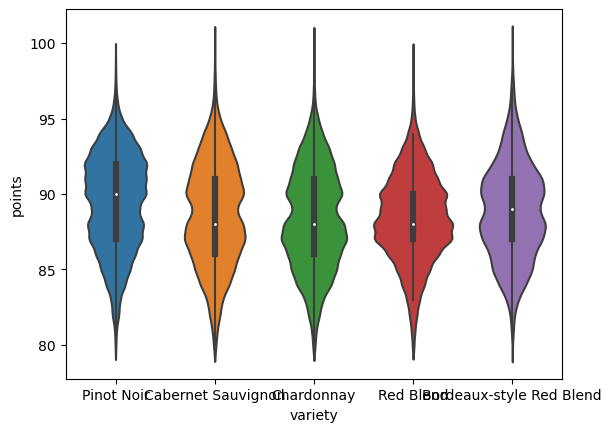

In [28]:
sns.violinplot(
    x='variety',
    y='points',
    data=df[df.variety.isin(df.variety.value_counts()[:5].index)]
)

# Hex Plot

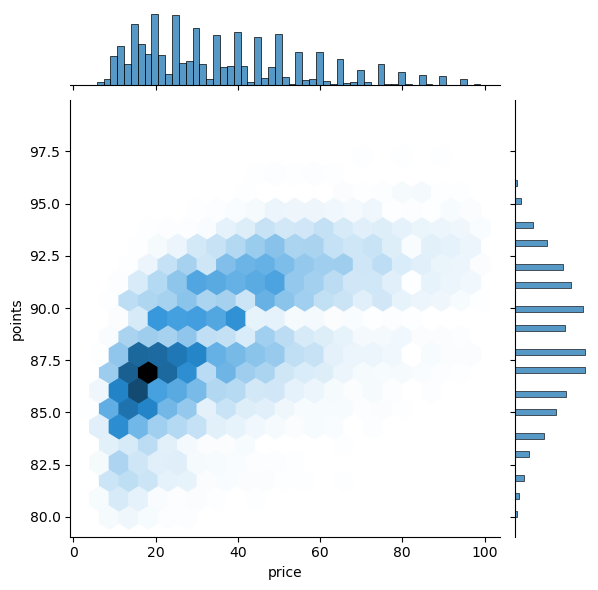

In [29]:
sns.jointplot(x='price', y='points', data=df[df['price'] < 100], kind='hex', 
              gridsize=20)

# Scatter Plot

Text(0, 0.5, 'Points')

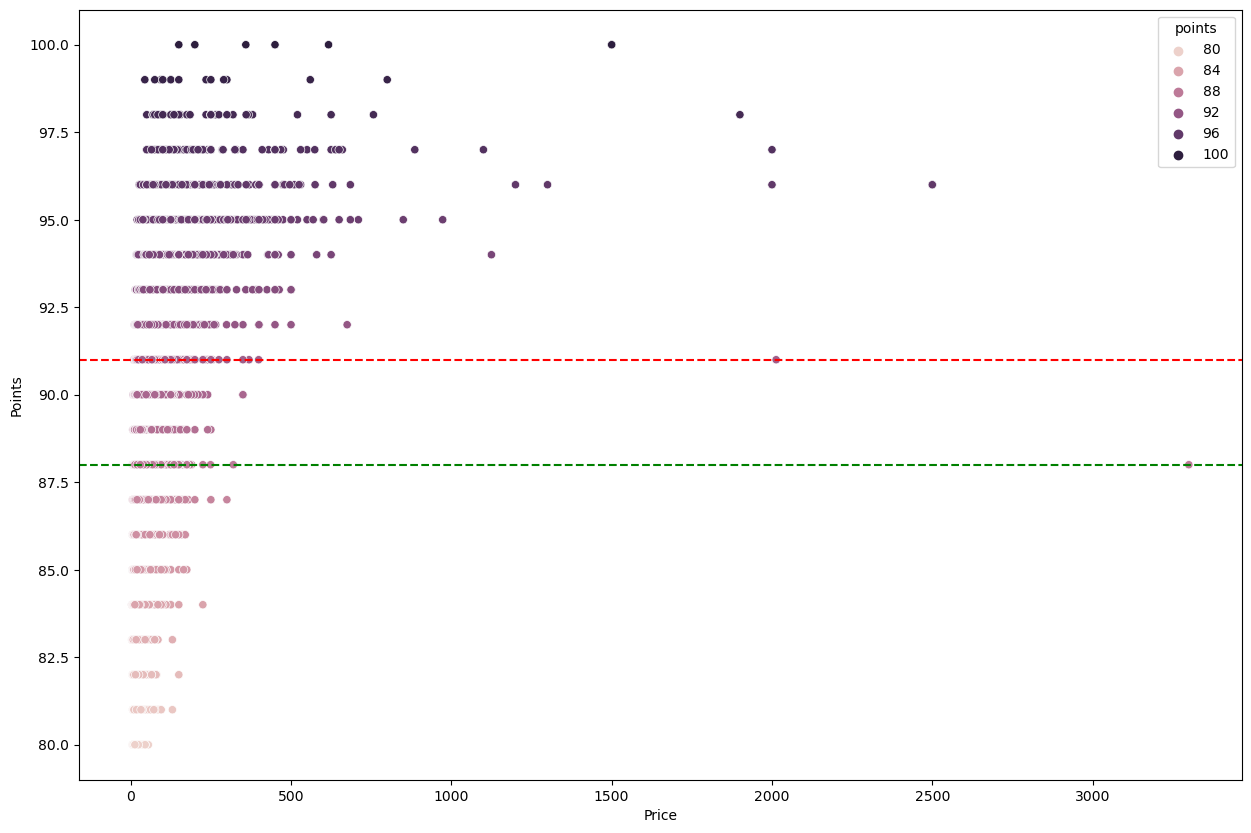

In [30]:
plt.figure(figsize=(15, 10))
g = sns.scatterplot(
    data=df, x="price", y="points", hue="points",
)
g.axhline(88, linestyle='--', color='g')
g.axhline(91, linestyle='--', color='r')
plt.xlabel("Price")
plt.ylabel("Points")

### The green line represents the median value of points awarded to any wine shop out there. The red line corresponds to 75th percentile value of points awareded to the wine.

# HeatMap

### Lets take log of price as price features tend to be highly sparse. Hence plot log(price) with respect to other feature will give us more clear picture between different relationships

<Axes: >

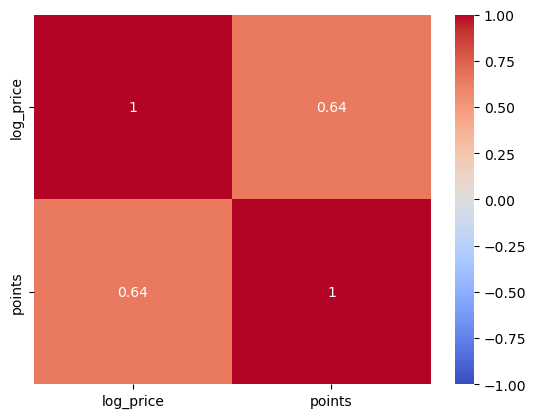

In [31]:
df['log_price'] = np.log(df['price'])
corr = df[['log_price', 'points']].corr()
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

# WordCloud

In [32]:
stopwords = set(STOPWORDS)
stopwords.update(['wine', 'Drink'])

def get_wordcloud(wdata, col, stopwords):
    # Define the wordcloud function
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=350,
        max_font_size=250, 
        width=2000, height=1600,
        random_state=1,
    ).generate(" ".join(wdata[col].astype(str)))

    print(wordcloud)
    fig = plt.figure(figsize = (15,15))
    plt.imshow(wordcloud)
    plt.title(f" Wine {col.capitalize()} Word Cloud ",fontsize=20)
    plt.axis('off')
    plt.show()

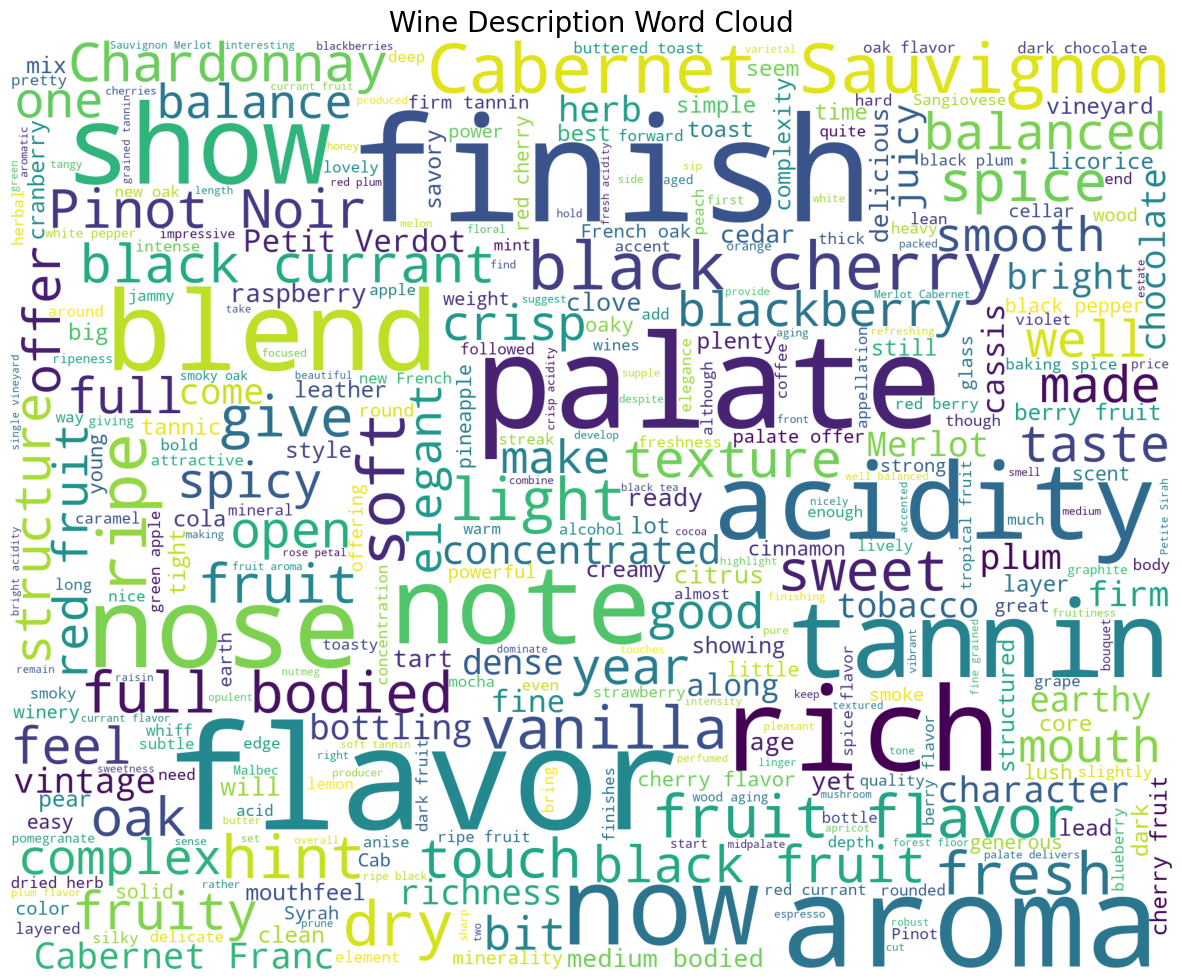

In [33]:
get_wordcloud(df, col = 'description', stopwords = stopwords)